In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
print(f'Features names is:{iris.feature_names}')

Features names is:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(f'Target names is:{iris.target_names}')

Target names is:['setosa' 'versicolor' 'virginica']


In [5]:
print(f'The data for the features are as:\n{iris.data[0:5]}')

The data for the features are as:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [6]:
print(f'Target for the given features are as:\n{iris.target[0:5]}')

Target for the given features are as:
[0 0 0 0 0]


In [7]:
#Create a dataframe from the iris dataset
df_iris = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
df_iris['species'] = pd.Categorical.from_codes(iris.target,iris.target_names)

In [10]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
X = df_iris.drop('species',axis = 1)
y = df_iris['species']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.2)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [14]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
predictions = model.predict(X_test)
predictions

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

In [16]:
y_test.values

['setosa', 'setosa', 'setosa', 'virginica', 'versicolor', ..., 'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa']
Length: 30
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [17]:
from sklearn.metrics import accuracy_score
score = accuracy_score(predictions,y_test)

In [18]:
print(f'Accuracy is:{score}')

Accuracy is:1.0


In [19]:
print(f'Total Correct prediction is:{accuracy_score(predictions,y_test,normalize=False)}')

Total Correct prediction is:30.0


In [20]:
print(f'Total Incorrect prediction is:{len(predictions) - accuracy_score(predictions,y_test,normalize=False)}')

Total Incorrect prediction is:0.0


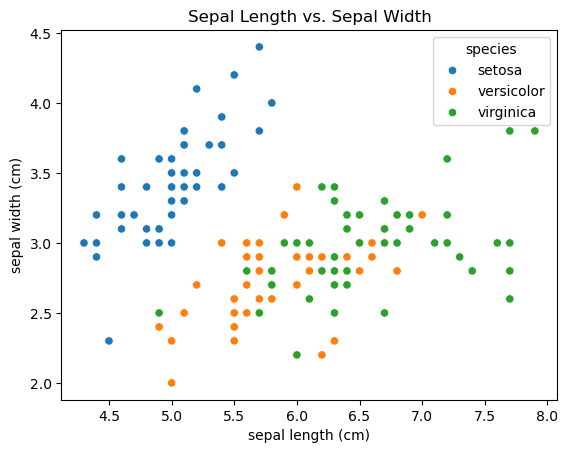

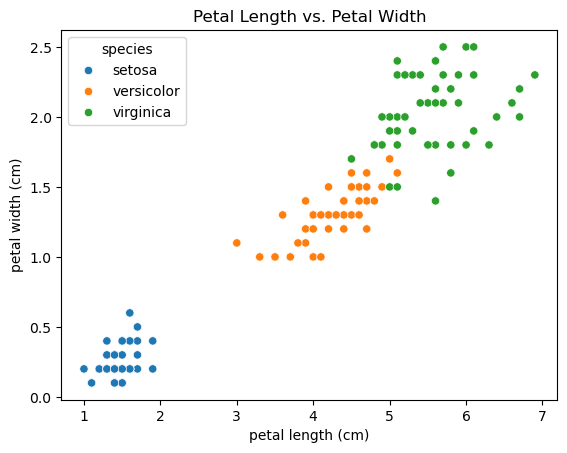

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot for two features
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df_iris)
plt.title('Sepal Length vs. Sepal Width')
plt.show()

# Create another scatter plot for two other features
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=df_iris)
plt.title('Petal Length vs. Petal Width')
plt.show()

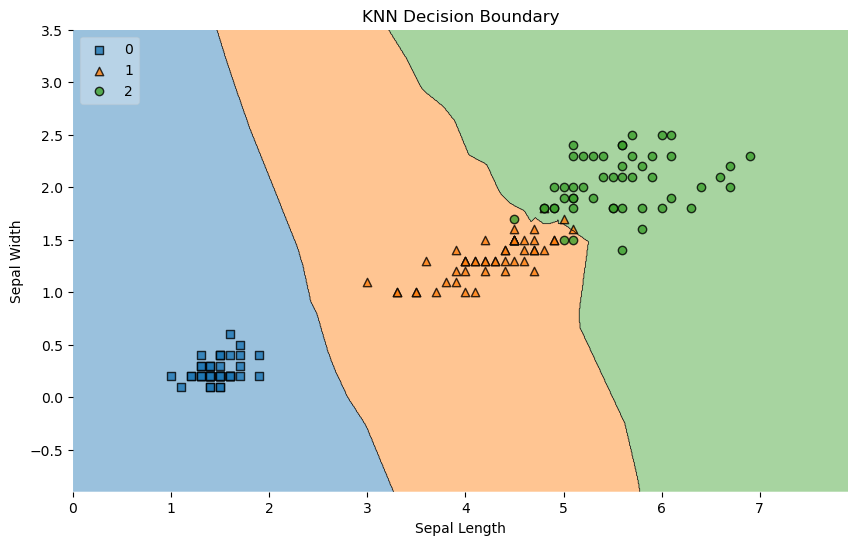

In [43]:
X = iris.data[:, 2:4]
y = df_iris['species'].cat.codes.to_numpy().astype(np.int_)
model.fit(X,y)
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10, 6))
plot_decision_regions(X,y, clf=model, legend=2)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('KNN Decision Boundary')
plt.show()

In [39]:
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [50]:
X = iris.data[:,2:4]
y = df_iris['species'].cat.codes.to_numpy().astype(np.int_)

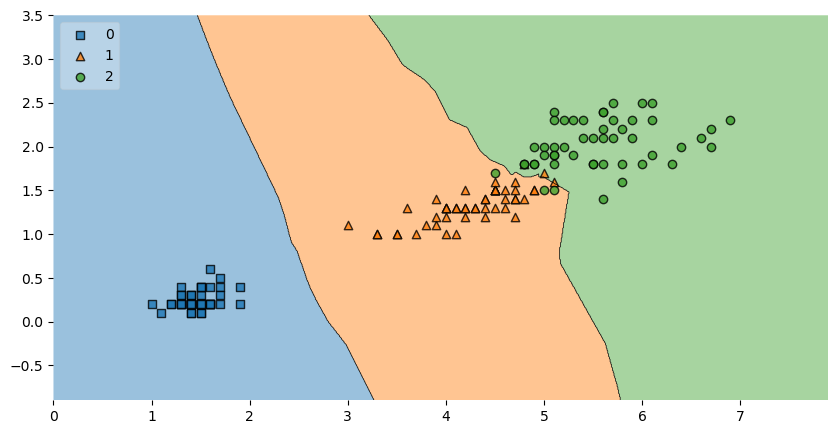

In [51]:
from mlxtend.plotting import plot_decision_regions
model.fit(X,y)
plt.figure(figsize=(10,5))
plot_decision_regions(X,y,clf=model,legend=2)
plt.show()